# US Election 2020 Election Forecasting Using Polling Data

![](https://i.imgur.com/XxjbFK6.jpg?1)


# Data Source
- The file we'll be using is called *presidential_poll.csv*

---
Polls can also be downloaded from here:
https://projects.fivethirtyeight.com/polls/
---

# USA Election 2020

This file contains links to the data behind [Polls for the rescent USA Elections ](https://data.fivethirtyeight.com/)



We'll be using the Latest Polls dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)


![](https://i.imgur.com/2ROon41.png?1
)

## Deliverables

1. Understanding our dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)
2. Cleaning and Exploring our Data
3. Changing our Data Layout
4. Understanind the US Electoral Process
5. Visualizations
6. Statistical Interpretation and Averaging of Polls
8. Result Analysis
9. Visualizng Results on a Map

# Understanding the US Electoral Process
### The USA Electoral Map
#### There are 538 seats and 270 to win

Learn more about it here - https://www.bbc.com/news/world-us-canada-53558176

![alt text](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for plotly maps
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

# sns.set_style('whitegrid')
# sns.set(font_scale=2)

# # Resize the size of plots
# fig_size = plt.rcParams["figure.figsize"]
 
# # Set figure width to 12 and height to 9
# fig_size[0] = 14
# fig_size[1] = 10
# plt.rcParams["figure.figsize"] = fig_size
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("PresidentialPoll1.csv")
df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0


In [3]:
print("Presidential Polls has", df.shape[0], "rows and", df.shape[1] , "columns")

Presidential Polls has 11909 rows and 38 columns


In [4]:
# Taking a look at all the columns
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

+ Not all the columns are important so let's select only the ones we need

In [5]:
# Let's keep only the information we'll be using, namely the poll's final results
df = df[['question_id','poll_id','state', 'pollster','start_date','end_date','answer','pct']]
df.head(3)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0


In [6]:
print("New Presidential Polls data has", df.shape[0], "rows and", df.shape[1] , "columns")

New Presidential Polls data has 11909 rows and 8 columns


In [7]:
# Checking for missing values
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 4546 missing values in the dataframe


# How many Pollsters are we working with?

In [8]:
print(len(df.pollster.unique()))

196


# Dealing with datetime

In [9]:
display(df.start_date.dtype)
print(df.end_date.dtype)

dtype('O')

object


In [10]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

# Converting dates into pandas datetime

In [11]:
pd.to_datetime(df.start_date).head()

0   2020-10-18
1   2020-10-18
2   2020-10-18
3   2020-10-18
4   2020-10-17
Name: start_date, dtype: datetime64[ns]

In [12]:
pd.to_datetime(df.end_date).head()

0   2020-10-19
1   2020-10-19
2   2020-10-19
3   2020-10-19
4   2020-10-19
Name: end_date, dtype: datetime64[ns]

In [13]:
df.start_date = pd.to_datetime(df["end_date"])
df.end_date = pd.to_datetime(df["end_date"])

In [14]:
# Check results. We can see the date columns have now been converted to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


In [15]:
df.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', nan, 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2', 'Nebraska CD-1'], dtype=object)

In [16]:
# We have some third party canidates, maybe we should just get of them
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons', 'Hornberger', 'Cuomo', 'Clinton', 'Obama',
       'Amash', 'Sanders', 'Warren', 'Bloomberg', 'Buttigieg',
       'Klobuchar', 'Gabbard', 'Steyer', 'Yang', 'Booker', 'Castro',
       "O'Rourke", 'Haley', 'Bullock', 'Delaney', 'Gillibrand',
       'Williamson', 'Messam', 'Bennet', 'de Blasio', 'Winfrey', 'Inslee',
       'Hickenlooper', 'Gravel', 'Moulton', 'Rapinoe', 'Swalwell', 'Ryan',
       'Schultz', 'Brown', 'Pelosi', 'Schumer', 'Ocasio-Cortez'],
      dtype=object)

In [17]:
# Groupby is used for arithmetical purposes For State, Candidate, Percentage

In [18]:
# Renaming Columns
df.rename(columns = {"answer":"candidate" , "pct": "percentages"} , inplace=True)

In [19]:
df.groupby(['state', 'candidate'])['percentages'].mean()

state      candidate
Alabama    Biden        39.161000
           Bloomberg    40.000000
           Buttigieg    37.000000
           Sanders      37.000000
           Trump        57.652571
                          ...    
Wisconsin  Trump        43.943984
           Warren       44.864091
           West          1.000000
Wyoming    Biden        31.654545
           Trump        66.992273
Name: percentages, Length: 437, dtype: float64

In [20]:
df.groupby(['state', 'candidate'])['percentages'].sum()

state      candidate
Alabama    Biden         1174.83
           Bloomberg       40.00
           Buttigieg       37.00
           Sanders         74.00
           Trump         2017.84
                          ...   
Wisconsin  Trump        16215.33
           Warren         987.01
           West             4.00
Wyoming    Biden          696.40
           Trump         1473.83
Name: percentages, Length: 437, dtype: float64

# State - Polls per State

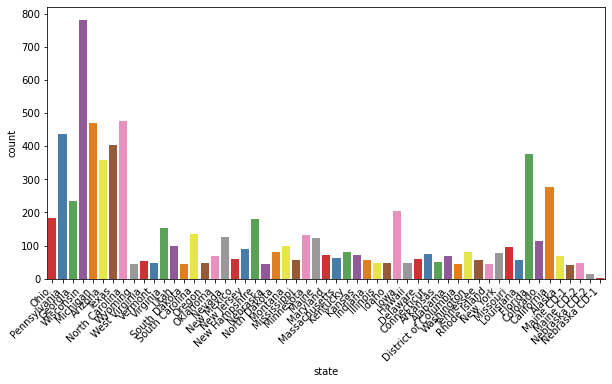

In [21]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='state',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Polls For Candidates

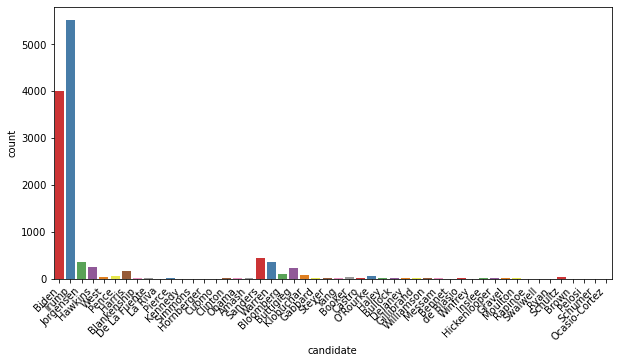

In [22]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='candidate',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Top 15 Candidates

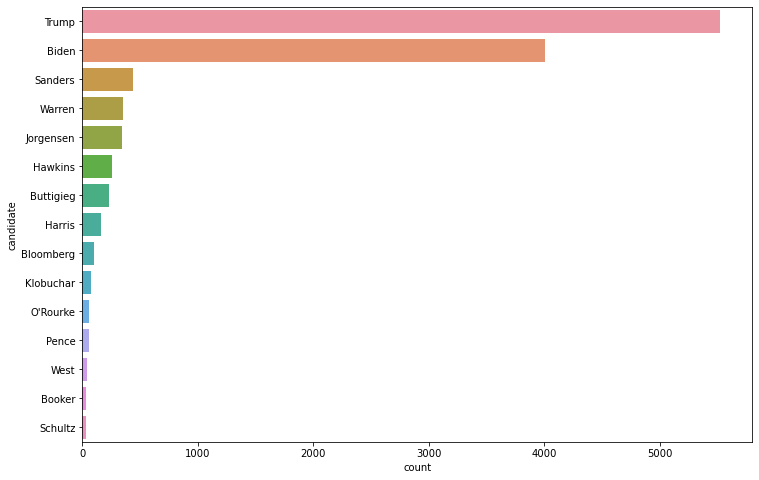

In [23]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "candidate", data=df, order = df['candidate'].value_counts().iloc[:15].index)
plt.show()

# create a pie chart for percentages

In [24]:
df.percentages.max()

90.53

In [25]:
df.percentages.mean().round(3)

43.336

In [26]:
df.percentages.median().round(3)

45.0

In [27]:
df.percentages.min()

0.0

In [28]:
# All the above can now be simply confirmed with descibe for a descriptive statistical analysis
df.percentages.describe()

count    11909.000000
mean        43.335947
std         12.748563
min          0.000000
25%         41.000000
50%         45.000000
75%         50.000000
max         90.530000
Name: percentages, dtype: float64

# Very_low , Unsatisfactory , satisfactory , highly_satisfactory

In [29]:
very_low = df[df["percentages"] < 25]
unsatisfactory = df[(df["percentages"] >=25) & (df["percentages"] < 43)]
satisfactory = df[(df["percentages"] >=43) & (df["percentages"] < 65)]
highly_satisfactory = df[df["percentages"] >=65]

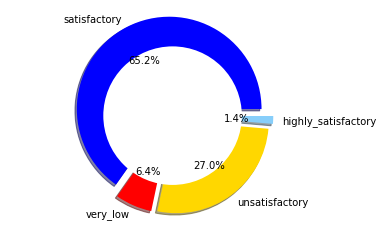

In [30]:
labels = ["satisfactory","very_low","unsatisfactory","highly_satisfactory"]
sizes = [len(satisfactory),len(very_low),len(unsatisfactory),len(highly_satisfactory)]
colors = ["blue","red","gold","lightskyblue"]
explode = (0.08, 0.06, 0.07 , 0.09)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%" , shadow=True)
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.show()

# Cleaning and Exploring our data
### Filter out older Polls
Let's get all polls that start or end between Aug 1st and Nov 2nd 2020. This gives us the 3 months leading up to the Nov 2nd Election Date.

In [31]:
start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [32]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0
5372,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Jorgensen,3.0
5373,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Hawkins,1.0
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.0


# Let's focus the data on only Trump and Biden

In [33]:
candidates = ['Trump', 'Biden']
df2 = df.loc[df['candidate'].isin(candidates)]
df2.candidate.unique()

array(['Biden', 'Trump'], dtype=object)

In [34]:
df2['candidate'].value_counts()

Biden    2379
Trump    2375
Name: candidate, dtype: int64

In [35]:
# Let's check percentage for both Biden and Trump 
df2['candidate'].value_counts()/len(df2)*100

Biden    50.04207
Trump    49.95793
Name: candidate, dtype: float64

# Observations:
+ We can see how very close the Polls are between Trump and Biden

# Let's visualize the results

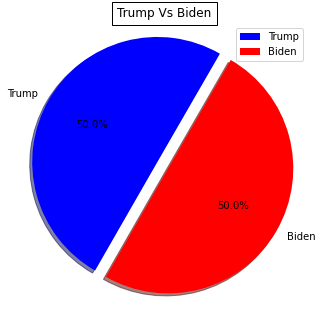

In [36]:
candidate_val = ['Trump','Biden']
candidate = df2['candidate'].value_counts()

candidate = candidate.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Trump Vs Biden' , bbox={'facecolor':'white','pad':5})
labels = 'Trump','Biden'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(candidate ,explode =explode ,labels=labels ,colors =colors ,autopct = '%1.1f%%' ,shadow = True,startangle = 60)
plt.legend(labels = candidate_val)
plt.axis('equal')
plt.show()

# Let's check for duplicates

In [37]:
df2.head()

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0


In [38]:
# Its a smart idea to use the ids to find the duplicates
ids = df2["poll_id"]
df2[ids.isin(ids[ids.duplicated()])].head()

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0


In [39]:
# Let's look at the first Poll id and notice how each poll occupies two lines
df2.loc[df2['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0


In [40]:
# We can see from the above that there are some duplicates
# Also before we continue, national polls are labeled NaN, let's remove those since we can't really take anything useful from it
df2[df2['state'].isna()]

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
6,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Biden,48.10
7,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Trump,45.80
10,133811,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Biden,49.00
11,133811,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Trump,46.20
30,133798,71440,NaN,USC Dornsife/Los Angeles Times,2020-10-19,2020-10-19,Biden,52.55
...,...,...,...,...,...,...,...,...
5365,127104,67890,NaN,Morning Consult,2020-08-01,2020-08-01,Trump,43.00
5366,132505,70851,NaN,SurveyMonkey,2020-08-01,2020-08-01,Biden,53.23
5367,132505,70851,NaN,SurveyMonkey,2020-08-01,2020-08-01,Trump,44.66
5368,132630,70851,NaN,SurveyMonkey,2020-08-01,2020-08-01,Biden,52.02


In [41]:
len(df2.poll_id.unique())

1537

# Let's remove the select only sates without any null values

In [42]:
# Also before we continue, national polls are labeled NaN, let's remove those since we can't really take anything useful from it
df3 = df2[df2['state'].notna()]
df3.head()

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0


In [43]:
len(df3.poll_id.unique())

1099

# Group by state vs Candidate percentage for each State

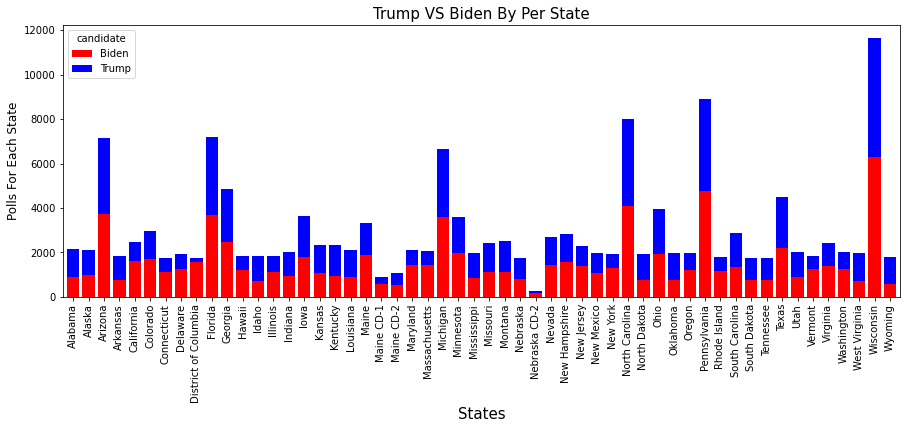

In [110]:
# Plot the above
result = df3.groupby(['state','candidate'])['percentages'].sum()

result.unstack().plot(kind='bar' , width = 0.8 , stacked=True , color=['Red','Blue'] , grid=False , figsize = (15,5))
plt.ylabel("Polls For Each State" , fontsize = 12)
plt.xlabel('States' , fontsize = 15)
plt.title("Trump VS Biden By Per State" , fontsize = 15)
plt.show()

# Changing Our Data Layout
We need to put the polls on a single line for easier data processing

In [44]:
# Start our index from 1 instead of 0 so that this works
df3.index = np.arange(1, len(df3) + 1)

# create a join_index prefix for the new columns from the row below
df3["join_index"] = df3.index + 1
df3["join_index"]
# So from the below we can see i shifted the numbers by adding 1 to the index

1          2
2          3
3          4
4          5
5          6
        ... 
3286    3287
3287    3288
3288    3289
3289    3290
3290    3291
Name: join_index, Length: 3290, dtype: int64

In [45]:
# Get the odd rows 
odd_rows = df3[df3.index % 2 == 1] # if number is not divisible by 2 there will be no remainder

# Now we join them
grouped = odd_rows.join(df3, "join_index", rsuffix=" second")
grouped

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,candidate second,percentages second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,46.0,3282,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,44.0,3283
3283,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,49.0,3284,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,45.0,3285
3285,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Biden,52.0,3286,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Trump,41.0,3287
3287,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.0,3288,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0,3289


# Now let's deal with the state names

In [46]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

### We can see the end of some of the states names are CD-1 and CD-2. 
+ Let's remove them

In [47]:
# if you want to operate on multiple columns, put them in a list like so:
cols = ["state"]

# pass them to df.replace(), specifying each char and it's replacement:
grouped[cols] = grouped[cols].replace({' CD-1': '', ' CD-2': ''}, regex=True)

In [48]:
# Check results
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

In [49]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [50]:
group2 = grouped.copy()

In [106]:
res_summary = group2.replace({"state": us_state_abbrev}) 
res_summary.head()

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,candidate second,percentages second,join_index second
1,133816,71450,OH,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3
3,133838,71457,PA,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5
5,133777,71435,GA,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7
7,133664,71379,PA,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9
9,133666,71379,PA,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11


In [55]:
len(res_summary["state"].unique())

51

# Plotting the US Map

In [59]:
res_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 3289
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   question_id         1645 non-null   int64         
 1   poll_id             1645 non-null   int64         
 2   state               1645 non-null   object        
 3   pollster            1645 non-null   object        
 4   start_date          1645 non-null   datetime64[ns]
 5   end_date            1645 non-null   datetime64[ns]
 6   candidate           1645 non-null   object        
 7   percentages         1645 non-null   float64       
 8   join_index          1645 non-null   int64         
 9   question_id second  1645 non-null   int64         
 10  poll_id second      1645 non-null   int64         
 11  state second        1645 non-null   object        
 12  pollster second     1645 non-null   object        
 13  start_date second   1645 non-null   datetime64[n

In [60]:
for col in res_summary.columns:
    res_summary[col] = res_summary[col].astype(str)

In [101]:
data = dict(
    type='choropleth',
    #colorscale = 'Viridis',#'Hot','Jet','Earth'.....
    #reversescale = True,
    locations = res_summary['state'],
    locationmode = 'USA-states',
    z = res_summary['percentages'],
    text = res_summary['state'],
    # setting the thickness and color of the line in marker
    marker = dict(line = dict(color='rgb(255,77,77)',width = 2)),
    colorbar = {'title':"Trump Vs Biden "}
            ) 

layout = dict(title = '2020 General Election Trump VS Biden Data',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choropleth_map = go.Figure(data = [data],layout = layout)

iplot(choropleth_map,validate=False)

In [102]:
res_summary.head()

,question_id,poll_id,state,pollster,start_date,end_date,candidate,percentages,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,candidate second,percentages second,join_index second
1,133816,71450,OH,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3
3,133838,71457,PA,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5
5,133777,71435,GA,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7
7,133664,71379,PA,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9
9,133666,71379,PA,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11


# 2016 Elections Clinton Vs Trump

In [56]:
poll = pd.read_csv("2016election.csv")
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [57]:
print("2016 Data has" ,poll.shape[0] , "rows and" , poll.shape[1] , "columns")

2016 Data has 1522 rows and 17 columns


In [58]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [59]:
poll.isna().sum()

Pollster                    0
Start Date                  0
End Date                    0
Entry Date/Time (ET)        0
Number of Observations    509
Population                  0
Mode                        0
Trump                       0
Clinton                     0
Other                     424
Undecided                  62
Pollster URL                0
Source URL                  0
Partisan                    0
Affiliation                 0
Question Text             861
Question Iteration          0
dtype: int64

In [60]:
poll.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton',
       'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

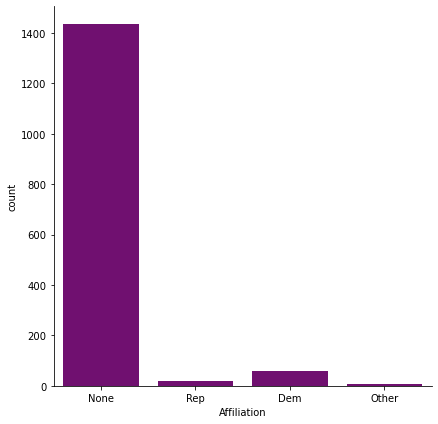

In [61]:
# Vis
sns.factorplot('Affiliation' , data=poll, kind="count", legend=True, color="purple",size=6);

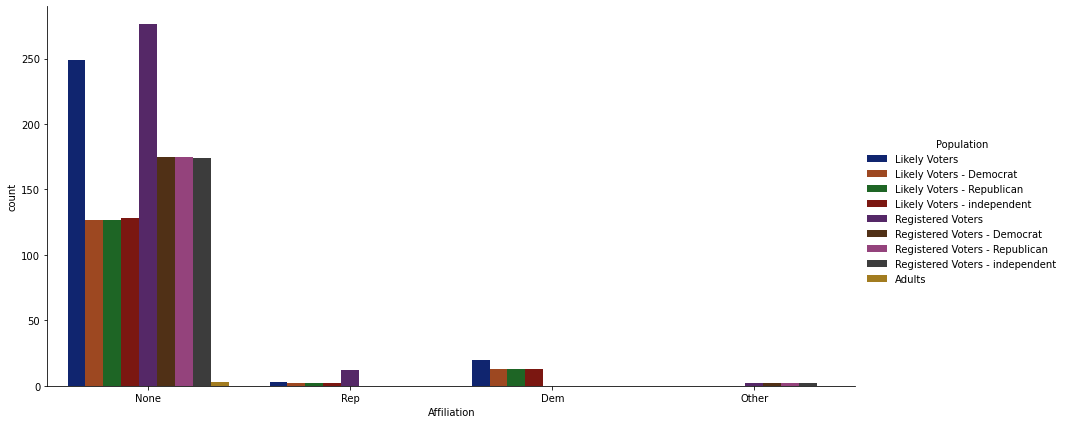

In [62]:
sns.factorplot('Affiliation' ,data=poll, kind="count", legend=True,hue="Population", color="purple",
               size=6 , aspect=2, palette="dark");

In [63]:
average = pd.DataFrame(poll.mean())
average.drop("Number of Observations" , inplace=True)
average

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [64]:
std = pd.DataFrame(poll.std())
std.drop("Number of Observations" , inplace=True)
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


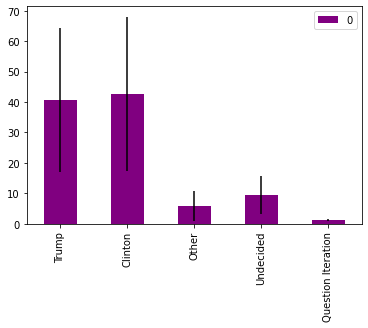

In [65]:
average.plot(yerr=std,kind="bar" , legend=True, color="purple", fontsize=10);

In [66]:
poll_avg = pd.concat([average , std] , axis=1)
poll_avg.column = ["Average" ,"STD"]
poll_avg

,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


In [67]:
poll["End Date"]

0       2016-11-07
1       2016-11-07
2       2016-11-07
3       2016-11-07
4       2016-11-07
           ...    
1517    2015-06-22
1518    2015-05-26
1519    2015-05-26
1520    2015-05-26
1521    2015-05-26
Name: End Date, Length: 1522, dtype: object

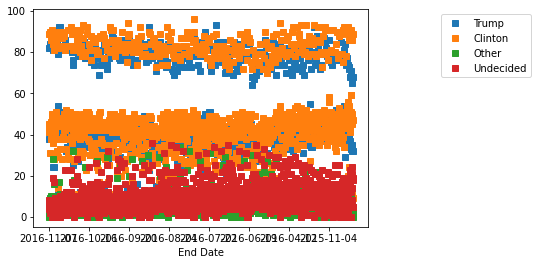

In [68]:
poll.plot(x="End Date", y=["Trump","Clinton","Other","Undecided"] ,linestyle="",
          marker="s").legend(bbox_to_anchor=(1.5, 1))

plt.show()

In [69]:
from datetime import datetime

In [70]:
poll["Difference"] = poll["Trump"] - poll["Clinton"]/100
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,40.55
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,5.11
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,81.93
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,37.57
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,42.59


In [71]:
poll2 = poll.groupby("Start Date" , as_index=False).mean()
poll2.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,33.7625
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,34.5275
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,33.4900
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,36.1800
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,34.7550


# Plotting the difference

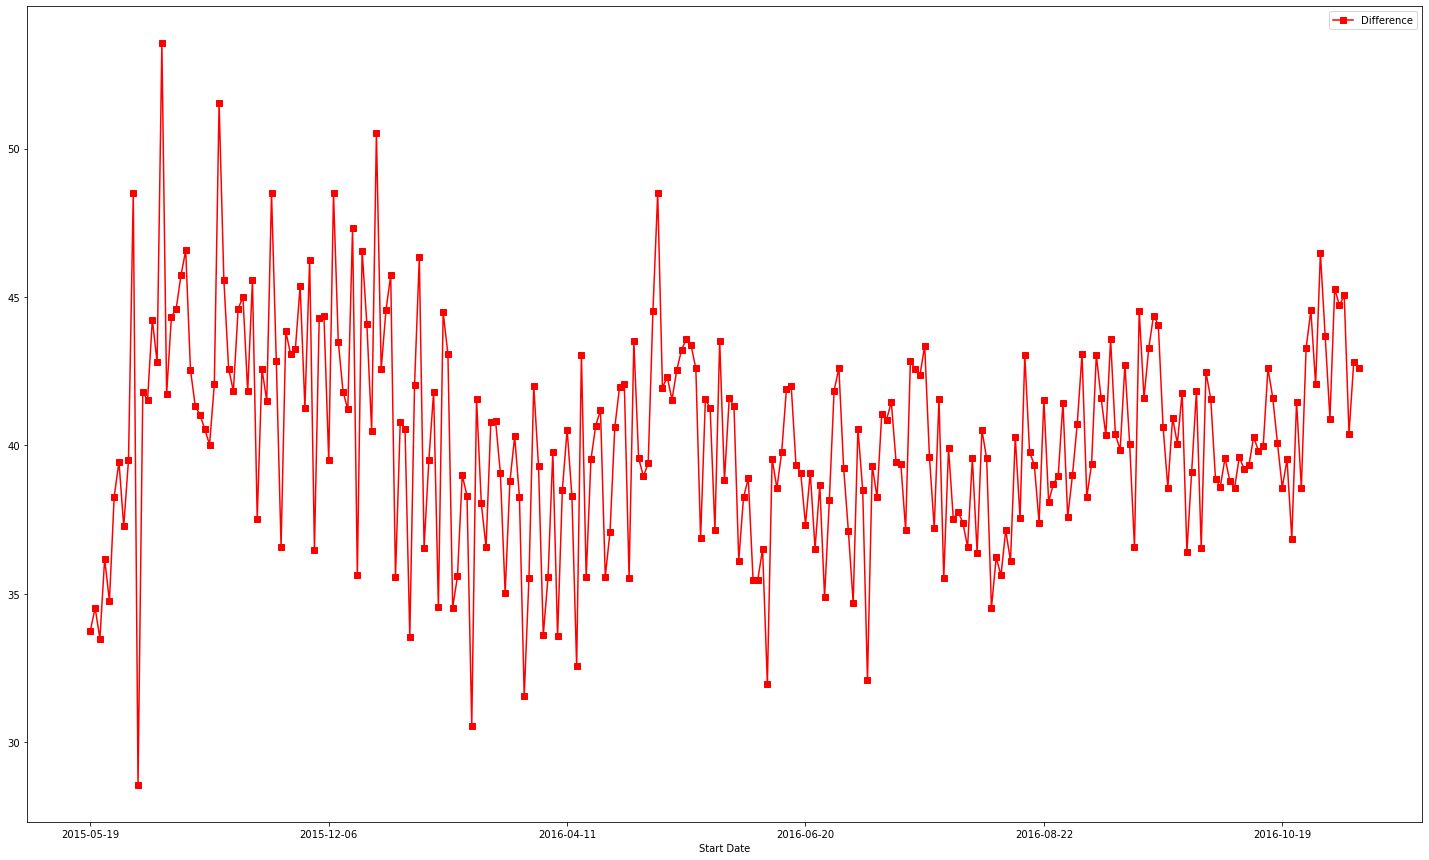

In [76]:
poll2.plot("Start Date","Difference", figsize=(25,15) , marker="s" , color="red");

# Plot markers

In [73]:
row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (min(xlimit))

row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (max(xlimit))

252
286


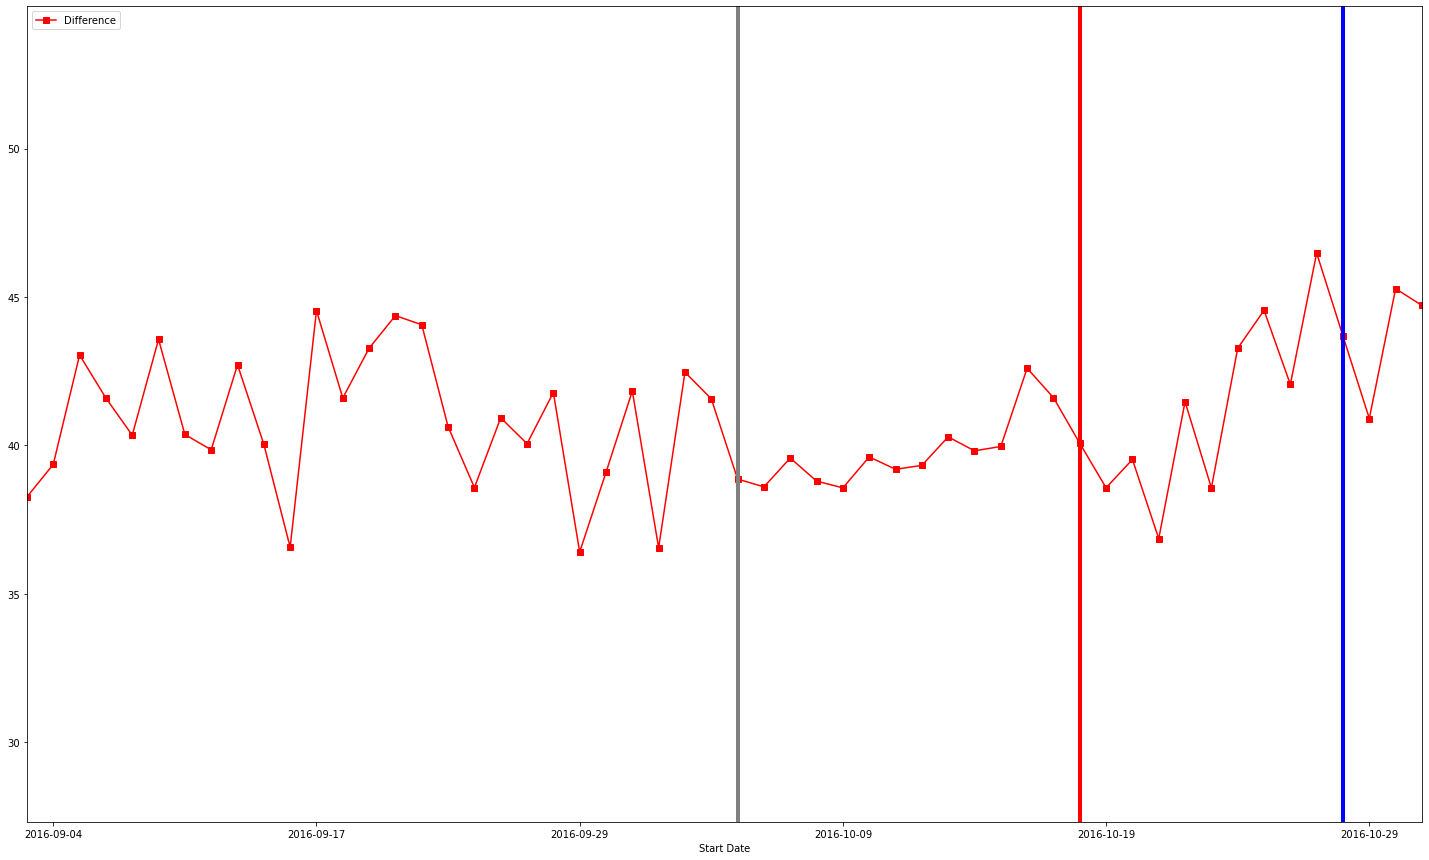

In [75]:
poll2.plot("Start Date","Difference", figsize=(25,15) , marker="s" , 
           color="red" , xlim=(209,262));
plt.axvline(x=209+27, linewidth=4, color="grey")
plt.axvline(x=209+40, linewidth=4, color="red")
plt.axvline(x=209+50, linewidth=4, color="blue");